In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.formula.api as smf

# Standard plotly imports
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import iplot, init_notebook_mode, plot
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

warnings.filterwarnings('ignore')
%matplotlib inline

In [11]:
# .ods Datei nach Geany kopieren
# mit replace , durch . ersetzen
# Neue .csv Datei erstellen
# Inhalt von Geany nach .csv kopieren, Tabulator als Texttrenner
df = pd.read_csv('data_files\Berechung_dCS_02.csv')

In [12]:
df.head()

C     S     T     A  Alpha  Theta  beta   dC   dS    zz   dCS
0  24.0 -19.8 -29.7  29.8  -39.0  133.9  41.8 -2.0  3.8  29.3  4.29
1  27.1 -24.0 -29.7  34.1  -41.0  129.8  45.0 -3.0  3.0  29.1  4.24
2  27.1 -22.0 -29.7  33.1  -38.3  130.8  44.2  0.0  4.4  27.3  4.40
3  23.0 -19.8 -29.7  29.1  -40.3  134.6  41.3 -2.0  4.0  30.8  4.47
4  26.0 -23.0 -29.7  32.9  -41.0  131.0  44.0 -4.0  3.2  29.7  5.12

In [13]:
df['dCS'].iplot(size=0, kind='hist', xTitle='degrees',
yTitle='count', title='dCS Distribution')
plt.show()

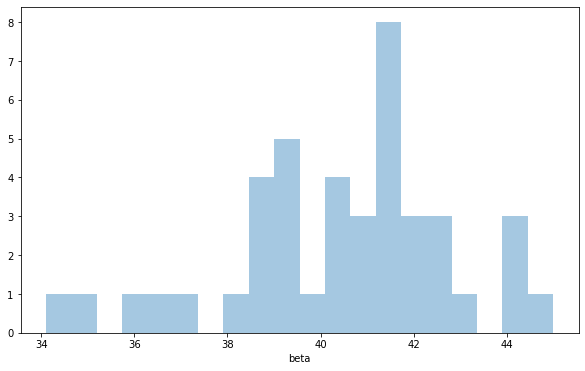

In [14]:
plt.figure(figsize=[10,6])
sns.distplot(df['beta'], kde=False, bins=20)
plt.show()

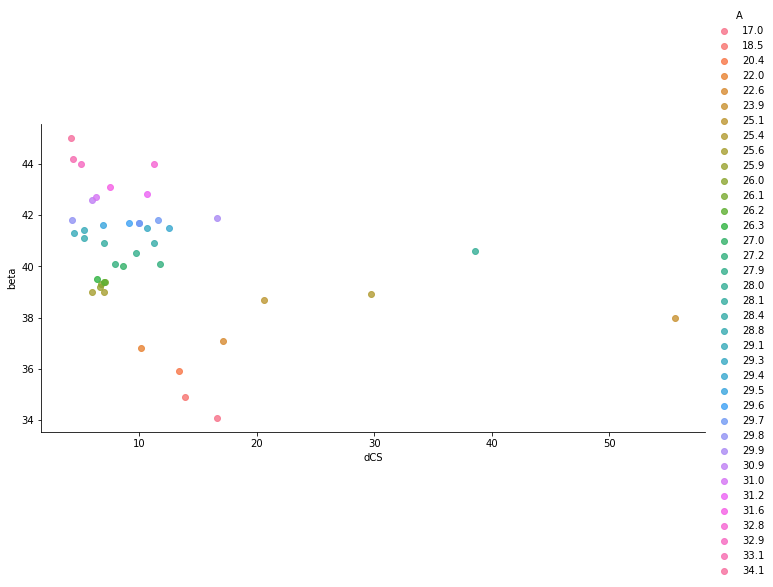

In [15]:
sns.lmplot('dCS', 'beta', data=df, fit_reg= False, aspect=2, size =5, hue='A')
plt.show()

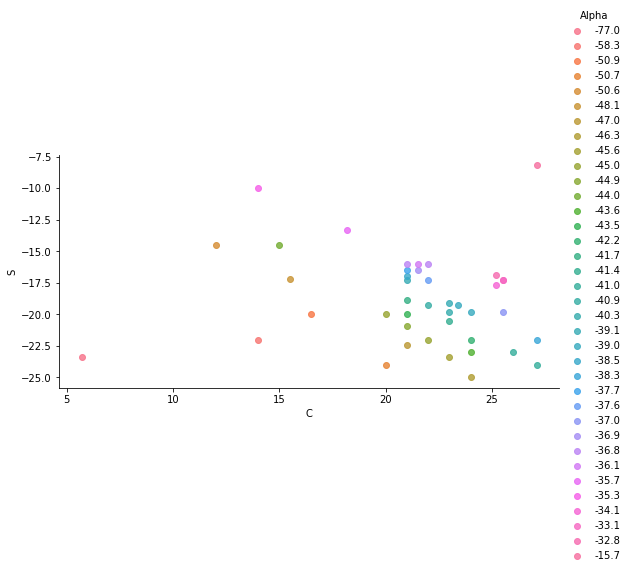

In [16]:
sns.lmplot('C', 'S', data=df, fit_reg= False, aspect=2, size =4, hue='Alpha')
plt.show()

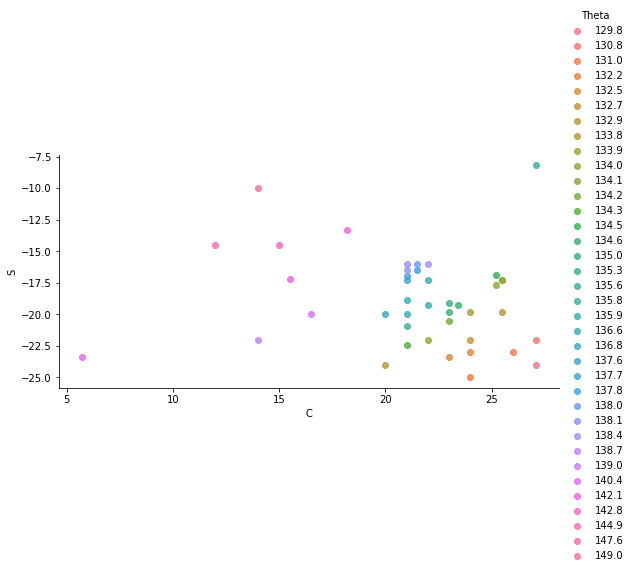

In [17]:
sns.lmplot('C', 'S', data=df, fit_reg= False, aspect=2, size =4, hue='Theta')
plt.show()

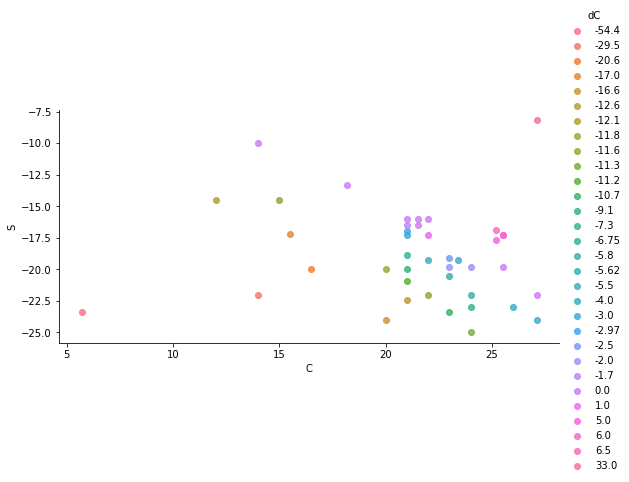

In [18]:
sns.lmplot('C', 'S', data=df, fit_reg= False, aspect=2, size =4, hue='dC')
plt.show()

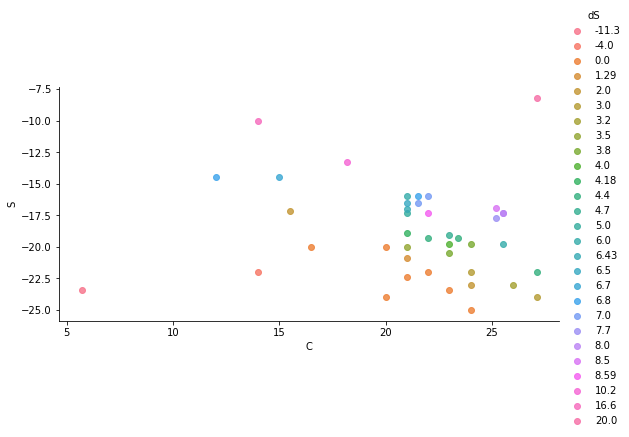

In [19]:
sns.lmplot('C', 'S', data=df, fit_reg= False, aspect=2, size =4, hue='dS')
plt.show()

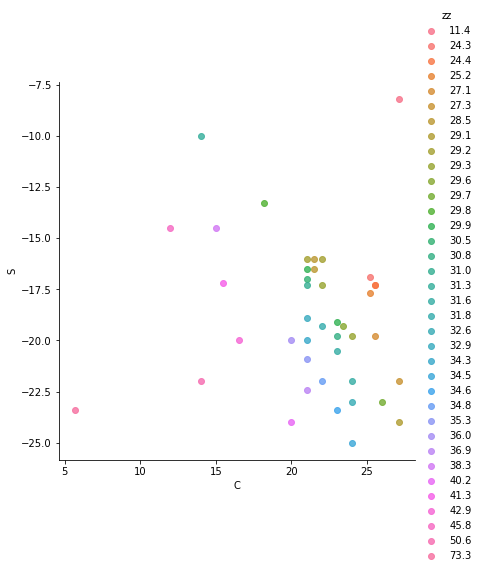

In [20]:
sns.lmplot('C', 'S', data=df, fit_reg= False, aspect=1, size =6, hue='zz')
plt.show()

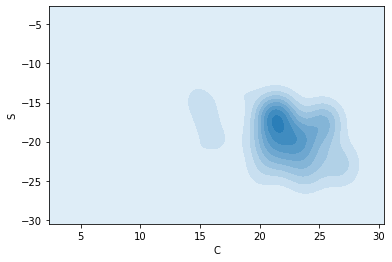

In [44]:
sns.kdeplot(df['C'], df['S'], shade=True)
plt.show()

In [ ]:
sns.kdeplot(df['C'], df['S'], shade=True)
plt.show()

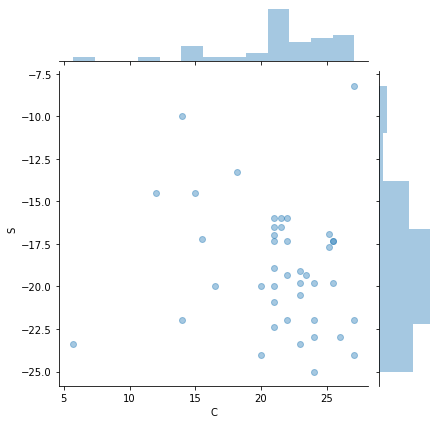

In [22]:
sns.jointplot('C', 'S', data=df, alpha=0.4)
plt.show()

In [23]:
df.iplot(
x='dC',
y='dS',
# Specify the category
categories='S',
xTitle='dC',
yTitle='dS',
title='Abweichungen dC und dS in Abh채ngigkeit von S')
plt.show()

In [24]:
df.iplot(
x='dC',
y='dS',
# Specify the category
categories='C',
xTitle='dC',
yTitle='dS',
title='Abweichungen dC und dS in Abh채ngigkeit von C')
plt.show()

In [25]:
figure = ff.create_scatterplotmatrix(
df[['C','S','T','A','Alpha','Theta','beta','dC','dS', 'zz', 'dCS']],
width=2000, height=2000,
diag='histogram',
index='dCS',
title='Scatterplot Matrix dCS')
plot(figure, filename='plotly_scatterplot_dCS.html')
figure.show()

In [26]:
figure = ff.create_scatterplotmatrix(
df[['C','S','T','A','Alpha','Theta','beta','dC','dS', 'zz', 'dCS']],
width=2000, height=2000,
diag='histogram',
index='dS',
title='Scatterplot Matrix dS')
plot(figure, filename='plotly_scatterplot_dS.html')
figure.show()

In [27]:
# figure = ff.create_scatterplotmatrix(
# df[['C','S','T','A','Alpha','Theta','beta','dC','dS']],
# width=2000, height=2000,
# diag='histogram',
# index='A')
# plot(figure, filename='plotly_scatterplot_A.html')
# figure.show()

In [28]:
# figure = ff.create_scatterplotmatrix(
# df[['C','S','T','A','Alpha','Theta','beta','dC','dS']],
# width=2000, height=2000,
# diag='histogram',
# index='Alpha')
# plot(figure, filename='plotly_scatterplot_Alpha.html')
# figure.show()

In [29]:
# figure = ff.create_scatterplotmatrix(
# df[['C','S','T','A','Alpha','Theta','beta','dC','dS']],
# width=2000, height=2000,
# diag='histogram',
# index='beta')
# plot(figure, filename='plotly_scatterplot_beta.html')
# figure.show()

In [30]:
# figure = ff.create_scatterplotmatrix(
# df[['C','S','T','A','Alpha','Theta','beta','dC','dS']],
# # df[['C','S','A','Alpha','Theta','dC']],
# width=2000, height=2000,
# diag='histogram',
# index='C')
# plot(figure, filename='plotly_scatterplot_C.html')
# figure.show()

In [31]:
# figure = ff.create_scatterplotmatrix(
# df[['C','S','T','A','Alpha','Theta','beta','dC','dS']],
# width=2000, height=2000,
# diag='histogram',
# index='S')
# plot(figure, filename='plotly_scatterplot_S.html')
# figure.show()

In [32]:
# figure = ff.create_scatterplotmatrix(
# df[['C','S','T','A','Alpha','Theta','beta','dC','dS']],
# # df[['C','S','A','Alpha','Theta','dC']],
# width=2000, height=2000,
# diag='histogram',
# index='T')
# plot(figure, filename='plotly_scatterplot_T.html')
# figure.show()

In [33]:
# g = sns.PairGrid(df, diag_sharey=False)
# g.map_lower(sns.kdeplot, )
# g.map_upper(plt.scatter)
# g.map_diag(sns.kdeplot)
# plt.show()
# g.savefig("pair_grid_C_S")

In [34]:
# sns.countplot(y = 'A', data=df)
# plt.show()

In [35]:
# sns.countplot(y = 'dCS', data=df)
# plt.show()

In [36]:
# fig = go.Figure(go.Box(
#         x=df.C,
#         y=df.S))
# py.iplot(fig, filename='sns_boxplot_C_S.html')
# fig.show()

In [37]:
corrs = df.corr()
figure = ff.create_annotated_heatmap(
z=corrs.values,
x=list(corrs.columns),
y=list(corrs.index),
annotation_text=corrs.round(2).values,
showscale=True)
figure['layout']['yaxis']['autorange'] = "reversed"
plot(figure, filename='heatmap_corr.html')
figure.show()

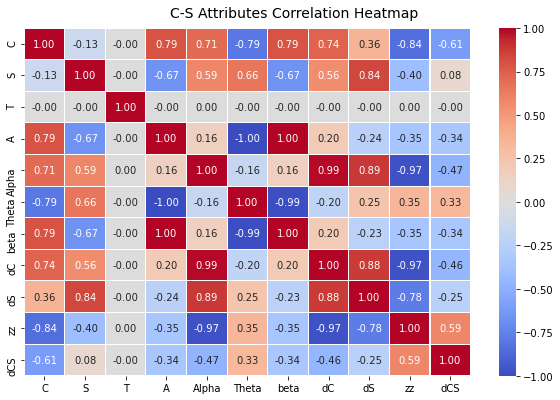

In [38]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('C-S Attributes Correlation Heatmap', fontsize=14)
f.savefig("heatmap_C_S")

In [39]:
model = smf.ols(formula='dS ~ S', data=df)
results = model.fit()
print(results.summary())
print(results.params)
print(results.conf_int())



                            OLS Regression Results                            
Dep. Variable:                     dS   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     94.66
Date:                Sun, 17 May 2020   Prob (F-statistic):           4.24e-12
Time:                        12:17:07   Log-Likelihood:                -101.13
No. Observations:                  42   AIC:                             206.3
Df Residuals:                      40   BIC:                             209.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.0684      2.259     11.539      0.0

In [40]:
model = smf.ols(formula='dC ~ C', data=df)
results = model.fit()
print(results.summary())
print(results.params)
print(results.conf_int())


                            OLS Regression Results                            
Dep. Variable:                     dC   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     47.38
Date:                Sun, 17 May 2020   Prob (F-statistic):           2.73e-08
Time:                        12:17:07   Log-Likelihood:                -147.82
No. Observations:                  42   AIC:                             299.6
Df Residuals:                      40   BIC:                             303.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -49.1261      6.442     -7.626      0.0

In [41]:
model = smf.ols(formula='Alpha ~ C + S', data=df)
results = model.fit()
print(results.summary())
print(results.params)
print(results.conf_int())


                            OLS Regression Results                            
Dep. Variable:                  Alpha   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     1647.
Date:                Sun, 17 May 2020   Prob (F-statistic):           2.14e-38
Time:                        12:17:07   Log-Likelihood:                -56.934
No. Observations:                  42   AIC:                             119.9
Df Residuals:                      39   BIC:                             125.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -43.9842      1.021    -43.074      0.0

In [42]:
model = smf.ols(formula='dC ~ Alpha', data=df)
results = model.fit()
print(results.summary())
print(results.params)
print(results.conf_int())


                            OLS Regression Results                            
Dep. Variable:                     dC   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     2122.
Date:                Sun, 17 May 2020   Prob (F-statistic):           2.79e-36
Time:                        12:17:07   Log-Likelihood:                -80.438
No. Observations:                  42   AIC:                             164.9
Df Residuals:                      40   BIC:                             168.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.4592      1.267     40.603      0.0